In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
import json
from pandas.io.json import json_normalize

In [35]:
# Import Users file as dataframe
with open('BX-CSV-Dump/book-crossing_users.json') as data_file:
    data = data_file.readlines()
# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
User = pd.read_json(data_json_str)

In [36]:
# Import Books file as dataframe
with open('BX-CSV-Dump/book-crossing_books.json') as data_file:
        data = data_file.readlines()
# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
Books = pd.read_json(data_json_str)

In [37]:
# Import Ratings file as dataframe
# Note that duplicate entries of ratings have already been removed
# Also users who do not rate at least one book has been removed
# Books not receiving as least one review have been removed from rating matrix
# Only Explicit Ratings are loaded and analysed
with open('BX-CSV-Dump/book-crossing_explicit_ratings.json') as data_file:
        data = data_file.readlines()
# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df = pd.read_json(data_json_str)

In [38]:
print(df.head())

      book_id  implicit  rating  user_id
0  0155061224       NaN       5   276726
1  052165615X       NaN       3   276729
2  0521795028       NaN       6   276729
3  038550120X       NaN       7   276744
4  0060517794       NaN       9   276747


In [39]:
# Visualize the dataset
sns.set_style('white')
ratings = pd.DataFrame(df.groupby('book_id')['rating'].mean())
ratings.head()

,rating
book_id,
0000913154,8.0
0001046438,9.0
000104687X,6.0
0001047213,9.0
0001047973,9.0


In [40]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('book_id')['rating'].count())
ratings.head()

,rating,num of ratings
book_id,,
0000913154,8.0,1
0001046438,9.0,1
000104687X,6.0,1
0001047213,9.0,1
0001047973,9.0,2


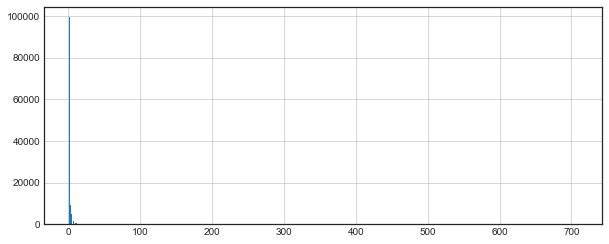

In [41]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=1000)

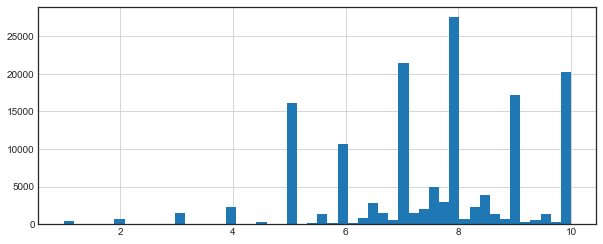

In [42]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=50)

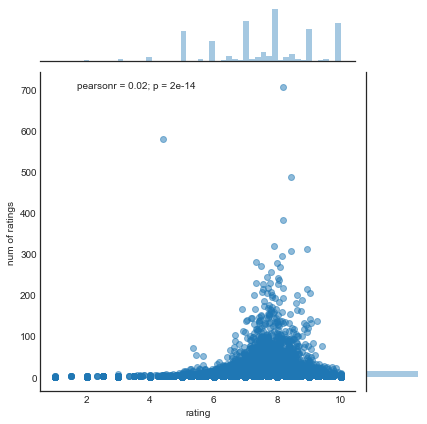

In [43]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [44]:
userrating = pd.DataFrame(columns=['num of ratings'])
userrating['rating'] = df.groupby('user_id')['rating'].mean()
userrating['num of ratings'] = df.groupby('user_id')['rating'].count()
userrating.head()

,num of ratings,rating
user_id,,
8,7,5.571429
9,1,6.000000
12,1,10.000000
14,3,5.333333
16,1,9.000000


In [45]:
# Get Number of Users and Number of Books
n_users = df.user_id.nunique()
n_books = df.book_id.nunique()

print('Num. of Users: ' + str(n_users))
print('Num of Books: ' + str(n_books))

Num. of Users: 68092
Num of Books: 149842


The maximum number of ratings from one user is: 6943
The minimum number of ratings from one user is: 1


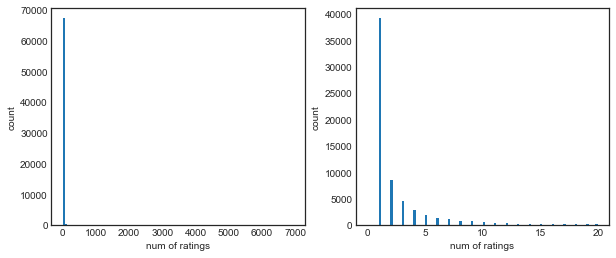

In [46]:
nummax = userrating['num of ratings'].max()
nummin = userrating['num of ratings'].min()
print('The maximum number of ratings from one user is: ' + str(nummax))
print('The minimum number of ratings from one user is: ' + str(nummin))
# Visualize users and their ratings
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.set_xlabel('num of ratings')
ax1.set_ylabel('count')
hist1 = ax1.hist(x = userrating['num of ratings'], bins =100)
ax2.set_xlabel('num of ratings')
ax2.set_ylabel('count')
hist2 = ax2.hist(x = userrating['num of ratings'], bins =100, range=(0,20))

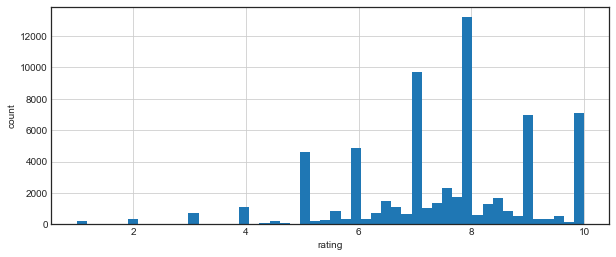

In [47]:
plt.figure(figsize=(10,4))
plt.xlabel('rating')
plt.ylabel('count')
userrating['rating'].hist(bins=50)

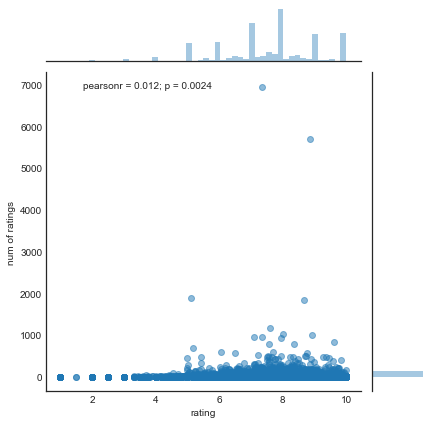

In [48]:
sns.jointplot(x='rating',y='num of ratings',data=userrating,alpha=0.5)

In [49]:
# Drop rating column
userrating.drop('rating', axis =1, inplace=True)

In [50]:
# From the histograms, we can see that more than 35,000 users in 
# total 68092 users only gives one rating 
# We remove the users who rated less than 3 books
userrating['user_id']=userrating.index
df = df.merge(userrating, on = 'user_id')
df.head()

,book_id,implicit,rating,user_id,num of ratings
0,0155061224,NaN,5,276726,1
1,052165615X,NaN,3,276729,2
2,0521795028,NaN,6,276729,2
3,038550120X,NaN,7,276744,1
4,0060517794,NaN,9,276747,5


In [51]:
# Remove users who rated fewer than 3 books
df = df[df['num of ratings']>2]
df.head()

,book_id,implicit,rating,user_id,num of ratings
4,0060517794,NaN,9,276747,5
5,0671537458,NaN,9,276747,5
6,0679776818,NaN,8,276747,5
7,0943066433,NaN,7,276747,5
8,1885408226,NaN,7,276747,5


In [67]:
# Select a subset of users
# To reduce calculation times in this kernel, I select only a subset of users

fraction = 0.1
size = df['book_id'].count()
index = np.random.randint(0, size, int(size*0.2))
subdf = df.iloc[index]
subdf.head()

,book_id,implicit,rating,user_id,num of ratings
323875,0375500510,NaN,7,232131,160
362919,0316354724,NaN,6,259488,8
304557,2070370720,NaN,4,217740,223
154943,1551669404,NaN,5,104334,19
235114,0451518756,NaN,10,164675,83


In [68]:
# Get Number of Users and Number of Books in Filtered Data
n_users = subdf.user_id.nunique()
n_books = subdf.book_id.nunique()

print('Num. of Users: ' + str(n_users))
print('Num of Books: ' + str(n_books))

Num. of Users: 14311
Num of Books: 38880


In [69]:
# Calculate the sparsity for ratings of books dataset
sparsity = round(1.0-len(subdf)/float(n_users*n_books), 5)
print('The sparsity level of BooksRecomender Dataset is ' + str(sparsity*100) + '%')

The sparsity level of BooksRecomender Dataset is 99.988%


In [70]:
# Map user_id from 1 to n_users
user_index = pd.DataFrame(subdf['user_id'].unique(), columns=['user_id'])
user_index.sort_values(by='user_id', axis=0, inplace= True)
user_index.reset_index(drop=True, inplace=True)
user_index['user_index']=user_index.index

# Map book_id from 1 to n_books
book_index = pd.DataFrame(subdf['book_id'].unique(), columns=['book_id'])
book_index.sort_values(by='book_id', axis=0, inplace= True)
book_index.reset_index(drop=True, inplace=True)
book_index['book_index']=book_index.index

In [71]:
subdf = subdf.merge(user_index, on ='user_id')
subdf = subdf.merge(book_index, on = 'book_id')

In [72]:
subdf.head()

,book_id,implicit,rating,user_id,num of ratings,user_index,book_index
0,0375500510,NaN,7,232131,160,11874,9068
1,0375500510,NaN,8,69078,499,3613,9068
2,0375500510,NaN,10,209516,189,10752,9068
3,0375500510,NaN,9,78015,22,4073,9068
4,0375500510,NaN,8,196077,148,10061,9068


In [73]:
# Get the top 10 rated books with more than 50 reviews
ratings['book_id'] = ratings.index
book_ratings = ratings.merge(Books, on='book_id').set_index('title')
book_ratings[book_ratings['num of ratings']>20].sort_values('rating', ascending=False).head(10)

,rating,num of ratings,book_id,author,publisher,year
title,,,,,,
Harry Potter and the Chamber of Secrets Postcard Book,9.869565,23,0439425220,J. K. Rowling,Scholastic,2002
"The Two Towers (The Lord of the Rings, Part 2)",9.720000,25,0618002235,J. R. R. Tolkien,Houghton Mifflin Company,1999
Calvin and Hobbes,9.583333,24,0836220889,Bill Watterson,Andrews McMeel Publishing,1987
"My Sister's Keeper : A Novel (Picoult, Jodi)",9.545455,22,0743454529,Jodi Picoult,Atria,2004
84 Charing Cross Road,9.464286,28,0140143505,Helene Hanff,Penguin Books,1990
"The Return of the King (The Lord of the Rings, Part 3)",9.402597,77,0345339738,J.R.R. TOLKIEN,Del Rey,1986
Where the Sidewalk Ends : Poems and Drawings,9.400000,25,0060256672,Shel Silverstein,HarperCollins,1974
The Little Prince,9.391304,23,0156012197,Antoine de Saint-ExupÃ©ry,Harvest Books,2000
Johnny Got His Gun,9.391304,23,0553274325,Dalton Trumbo,Bantam Books,1983


In [74]:
# Get the top 10 popular books
book_ratings.sort_values('num of ratings', ascending=False).head(10)

,rating,num of ratings,book_id,author,publisher,year
title,,,,,,
The Lovely Bones: A Novel,8.185290,707,0316666343,Alice Sebold,"Little, Brown",2002
Wild Animus,4.390706,581,0971880107,Rich Shapero,Too Far,2004
The Da Vinci Code,8.435318,487,0385504209,Dan Brown,Doubleday,2003
The Red Tent (Bestselling Backlist),8.182768,383,0312195516,Anita Diamant,Picador USA,1998
Divine Secrets of the Ya-Ya Sisterhood: A Novel,7.887500,320,0060928336,Rebecca Wells,Perennial,1997
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),8.939297,313,059035342X,J. K. Rowling,Arthur A. Levine Books,1999
The Secret Life of Bees,8.452769,307,0142001740,Sue Monk Kidd,Penguin Books,2003
Where the Heart Is (Oprah's Book Club (Paperback)),8.142373,295,0446672211,Billie Letts,Warner Books,1998
A Painted House,7.338078,281,044023722X,John Grisham,Dell Publishing Company,2001


In [75]:
# Is there any correlation between number of ratings 
# and the rating of books
m = np.corrcoef(x=book_ratings['rating'], y=book_ratings['num of ratings'])
print('The correlation between number of ratings and average rating of books is: ' + str(m[0,1]))

The correlation between number of ratings and average rating of books is: 0.0197672626057


In [76]:
# Collaborative Filtering
train_data_matrix = np.zeros((n_users, n_books))

In [77]:
import scipy.sparse as sp
from scipy.sparse import lil_matrix
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

In [78]:
# A model-based Collaborative Filtering system

# Train Test split
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(subdf, test_size=0.25)

#Create two user-item matrices, one for training and another for testing
train_data_matrix = lil_matrix((n_users, n_books))
for line in train_data.itertuples():
    train_data_matrix[line[5], line[6]] = line[3]  
    
test_data_matrix = lil_matrix((n_users, n_books))
for line in test_data.itertuples():
    test_data_matrix[line[5], line[6]] = line[3]

In [ ]:
# User pairwise_distances function from sklearn to calculate the cosine
# similarity between users and items respectively

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')

In [74]:
def predict(ratings, ratings_topred, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating)
        lists = ratings_topred.nonzero()
        row = lists[0]
        col = lists[1]
        pred = lil_matrix((n_users, n_books))
        for i in range(len(lists[0])):
            pred[row[i], col[i]] = mean_user_rating[row[i]] + similarity[row[i],:].dot(ratings_diff[:,col[i]]) / np.abs(similarity).sum(axis=1)[row[i]]
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [75]:
user_prediction = predict(train_data_matrix, test_data_matrix, user_similarity, type='user')

KeyboardInterrupt: 

In [ ]:
print('User-based CF MSE: ' + str(rmse(pred, test_data_matrix)))

In [205]:
#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 100)
S = np.diag(s)

In [206]:
# Test matrix index
lists = test_data_matrix.nonzero()
row = lists[0]
col = lists[1]
pred = lil_matrix((n_users, n_books))
for i in range(len(lists[0])):
    pred[row[i], col[i]] = np.dot(np.dot(u[row[i],:], S), vt[:, col[i]])

In [207]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].toarray() 
    ground_truth = ground_truth[ground_truth.nonzero()].toarray()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [208]:
print('User-based CF MSE: ' + str(rmse(pred, test_data_matrix)))

User-based CF MSE: 2.63009690951


In [213]:
print(pred[test_data_matrix.nonzero()].toarray())

[[  4.00000000e+00   1.00000000e+01   7.00000000e+00 ...,   1.82725395e-29
    4.55725295e-29   1.49423929e-27]]


In [212]:
print(test_data_matrix[test_data_matrix.nonzero()].toarray())

[[  5.   7.   8. ...,   5.  10.   7.]]


In [80]:
class recommend_system(object):
    def __init__(self):
        self.prediction = None
    def readfile(filename):
        filecontents = filename.readlines()
        contents=[]
        for line in filecontents:
            foo = line.strip('\n')
            contents.append([int(n) for n in foo.split(',')])
        data=np.asarray(contents)
        return data
    def MSE(self,R,d):
        # Replace the nan values by zero
        index=np.isnan(R)
        Rnew = R.copy()
        row, col = Rnew.shape
        Rnew[index]=0
        U,s,V = LA.svd(Rnew, full_matrices=False)
        s[d:]=0
        out = np.dot(U, np.dot(np.diag(s), V))
        Rnew[index]=out[index]
        self.prediction = out
        MSE=np.linalg.norm(out-Rnew)**2
        return MSE/(col*row-sum(sum(index)))
    def MLF(self, R, d, Lambda):
        row, col= R.shape
        U =  np.random.rand(row, d)
        V = np.random.rand(d, col)
        Rnew = R.copy()
        for i in range(10):
            current = np.dot(U, V)
            U=self.updateU(Rnew,V,Lambda)
            V=self.updateV(Rnew,U,Lambda)
        out = np.dot(U,V)
        self.prediction = out
        MSE=self.rmse(out, Rnew)
        return MSE/(col*row-sum(sum(index)))
    def updateU(self, R,V,Lambda):
        U = np.linalg.solve(np.dot(V, V.T)+Lambda*np.eye(len(V)), np.dot(V, R.T))        
        return U.T
    def updateV(self, R,U,Lambda):
        V = np.linalg.solve(np.dot(U.T,U)+Lambda*np.eye(len(U[0])), np.dot(U.T, R))
        return V
    def rmse(self, prediction, ground_truth):
        prediction = prediction[ground_truth.nonzero()].toarray() 
        ground_truth = ground_truth[ground_truth.nonzero()].toarray()
        return sqrt(mean_squared_error(prediction, ground_truth))
    def validate_accuracy(self,data):
        pred = self.prediction
        N = data.shape[0]
        n = 0
        for row in data:
            if (pred[row[0]-1, row[1]-1]>0 and row[2] == 1)\
            or (pred[row[0]-1, row[1]-1]<=0 and row[2] == 0):
                n += 1
        return float(n)/N

In [ ]:
d=np.array([2, 5])
recommender=recommend_system()
MSE = np.zeros((len(d)))
validation_accuracy = np.zeros((len(d)))
R=train_data_matrix
for k in range(len(d)):
    MSE[k]=recommender.MLF(R, d[k], 0.00001)
    validation_accuracy[k]=recommender.validate_accuracy(datav)
plt.figure(1)
plt.plot(d, MSE)
plt.xlim((0,20))
plt.figure(2)
plt.plot(d, validation_accuracy)